In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [151]:
def guessCritPt(x_l,y_l):
    mid_pt = np.max(y_l)/2
    mid_idx = np.argmin(np.abs(y_l-mid_pt))
    return x_l[mid_idx] - y_l[mid_idx]*(x_l[mid_idx+1]-x_l[mid_idx-1])/(y_l[mid_idx+1]-y_l[mid_idx-1])

def finiteScaling(x_l,y_l,ct_pt,nu,beta,max_size):
    # return (x_l-ct_pt)*(max_size**(1/nu)), y_l*(max_size**(2*beta/nu))
    return (x_l-ct_pt)*(max_size**(1/nu))*(max_size**(-2*beta/nu)), y_l

def finiteScalingCost(param,x_arr,y_arr,max_size_l,num_interp):
    ct_pt = param[0]
    nu = param[1]
    beta = param[2]
    
    n_exp = x_arr.shape[0]

    target_x, target_y = finiteScaling(x_arr[-1,:],y_arr[-1,:],ct_pt,nu,beta,max_size_l[-1])
    
    cost = 0
    for i in range(n_exp-1):
        scaled_x, scaled_y = finiteScaling(x_arr[i,:],y_arr[i,:],ct_pt,nu,beta,max_size_l[i])
        interp_x = np.linspace(-scaled_x[-1],scaled_x[-1],num_interp)
        interp_y = np.interp(interp_x,scaled_x,scaled_y)
        interp_target_y = np.interp(interp_x,target_x,target_y)
        cost = cost + np.linalg.norm(interp_target_y-interp_y)
    
    return cost

def finiteScalingCB(param):
    print(param)
    

### Toric Code
horizontal, scale dy, scaling analysis

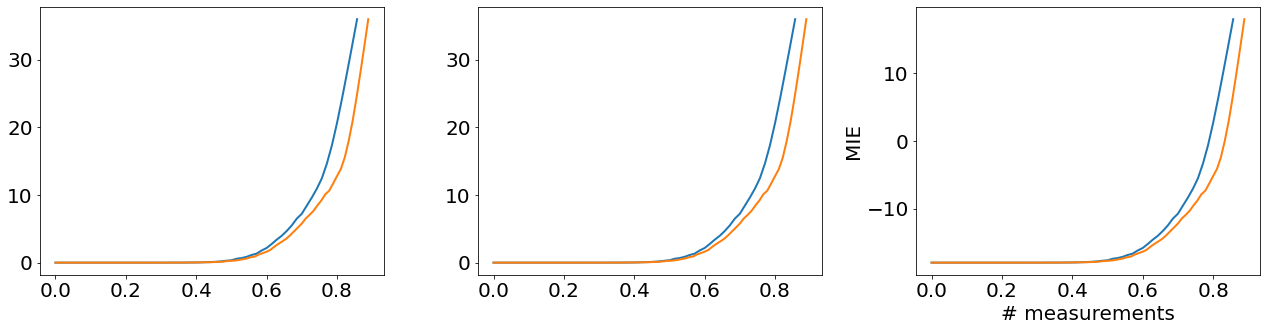

In [38]:
plt.rcParams["figure.figsize"] = (18,5)
for i in range(1,3):
    raw = np.loadtxt("../data/230416/230416_%d_cmi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,1)
    plt.plot(raw[:,0]/(raw[-1,0]+40),raw[:,1])
    raw = np.loadtxt("../data/230416/230416_%d_mi.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,2)
    plt.plot(raw[:,0]/(raw[-1,0]+40),raw[:,1])
    raw = np.loadtxt("../data/230416/230416_%d_ci.csv"%(i),delimiter=',',skiprows=1)
    plt.subplot(1,3,3)
    plt.plot(raw[:,0]/(raw[-1,0]+40),raw[:,1])

# plt.xlim([0,100])
plt.xlabel("# measurements")
plt.ylabel("MIE")
plt.tight_layout()

### Toric Code
scaling analysis with Della data

/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_17874/1939915594.py:13: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n_meas_l/n_meas_l[-1],cmi_l/cmi_l[-1],'.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_17874/1939915594.py:16: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n_meas_l/n_meas_l[-1],mi_l/mi_l[-1],'.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_17874/1939915594.py:19: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n_meas_l/n_meas_l[-1],ci_l/ci_l[-1],'.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_17874/1939915594.py:13: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n_meas_l/n_meas_l[-1],cmi_l/cmi_l[-1],'.-')
/var/folders/d0/tvg6bvm9377bmz53zj2vwnf00000gn/T/ipykernel_17874/1939915594.py:16: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n_meas_l/n_meas_l[-1],mi_l/mi_l[-1],'.-')
/var/folders/d0/tvg6bvm9377bmz5

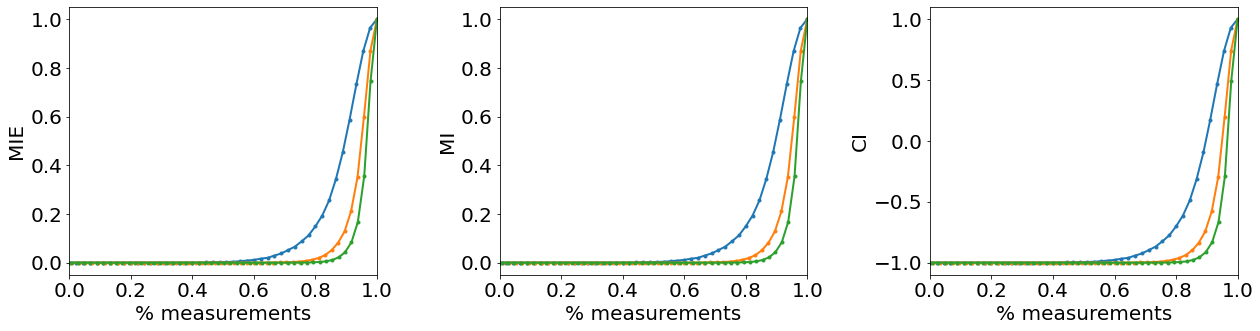

In [119]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 50
size_l = [20,40,60,80,100]
for i in range(1,6):
# for i in [1,2,4]:
    raw = np.load("../data/230416/230416_n%d_pp.npz"%(i+idx_start))
    n_meas_l = raw['n_meas_l']
    cmi_l = raw['cmi_l']
    mi_l = raw['mi_l']
    ci_l = raw['ci_l']
    plt.subplot(1,3,1)
    # plt.plot(n_meas_l/n_meas_l[-1],cmi_l,'.-')
    plt.plot(n_meas_l/n_meas_l[-1],cmi_l/cmi_l[-1],'.-')
    plt.subplot(1,3,2)
    # plt.plot(n_meas_l/n_meas_l[-1],mi_l,'.-')
    plt.plot(n_meas_l/n_meas_l[-1],mi_l/mi_l[-1],'.-')
    plt.subplot(1,3,3)
    # plt.plot(n_meas_l/n_meas_l[-1],ci_l,'.-')
    plt.plot(n_meas_l/n_meas_l[-1],ci_l/ci_l[-1],'.-')

xmin = 0
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

0.910485279706873


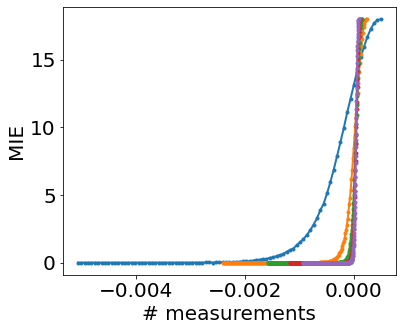

In [173]:
plt.rcParams["figure.figsize"] = (6,5)
idx_start = 20

raw = np.load("../data/230416/230416_n%d_pp.npz"%(5+idx_start))
n_meas_l = raw['n_meas_l']
max_meas = n_meas_l[-1]
n_meas_l = n_meas_l/max_meas
cmi_l = raw['cmi_l']

beta_i = 1
nu_i = 1
ct_pt_i = guessCritPt(n_meas_l,cmi_l)
print(ct_pt_i)

for i in range(1,6):
    raw = np.load("../data/230416/230416_n%d_pp.npz"%(i+idx_start))
    n_meas_l = raw['n_meas_l']
    max_meas = n_meas_l[-1]
    n_meas_l = n_meas_l/max_meas
    cmi_l = raw['cmi_l']
    scaled_meas, scaled_cmi = finiteScaling(n_meas_l,cmi_l,ct_pt_i,nu_i,beta_i,max_meas)
    plt.plot(scaled_meas,scaled_cmi,'.-')

    interp_meas = np.arange(-1000,1000,50)
    interp_cmi = np.interp(interp_meas,scaled_meas,scaled_cmi)
    # plt.plot(interp_meas,interp_cmi,'.-')

# plt.xlim([-1000,1000])
plt.xlabel("# measurements")
plt.ylabel("MIE")
plt.tight_layout()


In [138]:
def finiteScalingCost(param,x_arr,y_arr,max_size_l,num_interp):
    ct_pt = param[0]
    nu = param[1]
    beta = param[2]
    
    n_exp = x_arr.shape[0]

    target_x, target_y = finiteScaling(x_arr[-1,:],y_arr[-1,:],ct_pt,nu,beta,max_size_l[-1])
    
    cost = 0
    for i in range(n_exp-1):
        scaled_x, scaled_y = finiteScaling(x_arr[i,:],y_arr[i,:],ct_pt,nu,beta,max_size_l[i])
        interp_x = np.linspace(-scaled_x[-1],scaled_x[-1],num_interp)
        interp_y = np.interp(interp_x,scaled_x,scaled_y)
        interp_target_y = np.interp(interp_x,target_x,target_y)
        cost = cost + np.linalg.norm(interp_target_y-interp_y)
    
    return cost

def finiteScalingCB(param):
    print(param)
    

[-0.25000001  2.13015911  0.53253273]


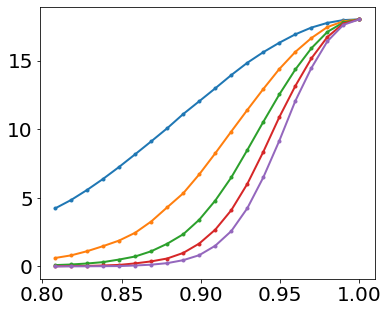

In [191]:
idx_start = 20
for i in range(1,6):
    raw = np.load("../data/230416/230416_n%d_pp.npz"%(i+idx_start))
    n_meas_l = raw['n_meas_l']
    max_meas = n_meas_l[-1]
    n_meas_l = n_meas_l/max_meas
    cmi_l = raw['cmi_l']

    resample_meas = np.linspace(0,1,100)
    resample_cmi = np.interp(resample_meas,n_meas_l,cmi_l)

    plt.plot(resample_meas[80:],resample_cmi[80:],'.-')

    if i == 1:
        n_meas_arr = resample_meas[80:]
        cmi_arr = resample_cmi[80:]
        max_meas_l = np.array([max_meas])
    else:
        n_meas_arr = np.vstack((n_meas_arr,resample_meas[80:]))
        cmi_arr = np.vstack((cmi_arr,resample_cmi[80:]))
        max_meas_l = np.append(max_meas_l,max_meas)

num_interp = 100
p0 = (0.91, 2, 0.5)

res = minimize(finiteScalingCost, p0, args=(n_meas_arr,cmi_arr,max_meas_l,num_interp))
pf = res.x
print(pf)

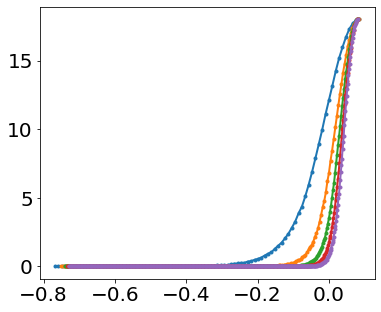

In [193]:
ct_pt = pf[0]
ct_pt = 0.9
nu = pf[1]
beta = pf[2]

plt.rcParams["figure.figsize"] = (6,5)
for i in range(1,6):
    raw = np.load("../data/230416/230416_n%d_pp.npz"%(i+idx_start))
    n_meas_l = raw['n_meas_l']
    max_meas = n_meas_l[-1]
    n_meas_l = n_meas_l/max_meas
    cmi_l = raw['cmi_l']
    scaled_meas, scaled_cmi = finiteScaling(n_meas_l,cmi_l,ct_pt,nu,beta,max_meas)
    plt.plot(scaled_meas,scaled_cmi,'.-')

    # plt.xlim([-1e5,1e5])